Filters of images are categorized as Low pass filters/smoothing filters and high pass filters (sharpning filters or edge detecting filters).

Low pass Filters inludes:
* Simple/Averaging blur filter
* Weighted Gaussain blur filter
* Median filter

High pass Filters includes:
* Sobel filter
* Prewitt filter
* Laplacian filter

import libraries


In [1]:
import cv2
import pydicom
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Import the dicom image

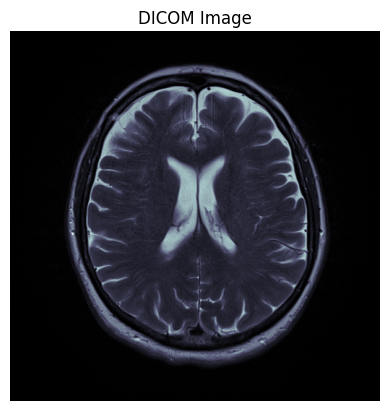

In [2]:
#read the DICOM file
filename = pydicom.dcmread('/home/sandzz/Documents/All documents/College/Study materials/8th sem /Medical_Image_Processing/Babaal_project/Images/Head_MRI.dcm')

#read the image pixel values
mri = filename.pixel_array

# Display the image
plt.imshow(mri, cmap=plt.cm.bone)
plt.title("DICOM Image")
plt.axis('off')
plt.show()

read other images

In [3]:
bdot =mpimg.imread("/home/sandzz/Documents/All documents/College/Study materials/8th sem /Medical_Image_Processing/Babaal_project/Images/blackdot.jpg")
atm =mpimg.imread("/home/sandzz/Documents/All documents/College/Study materials/8th sem /Medical_Image_Processing/Babaal_project/Images/atm.jpg")
box =mpimg.imread("/home/sandzz/Documents/All documents/College/Study materials/8th sem /Medical_Image_Processing/Babaal_project/Images/box.jpg")

# Smoothing Filters

Applying Simple/Average Blur Filter manually

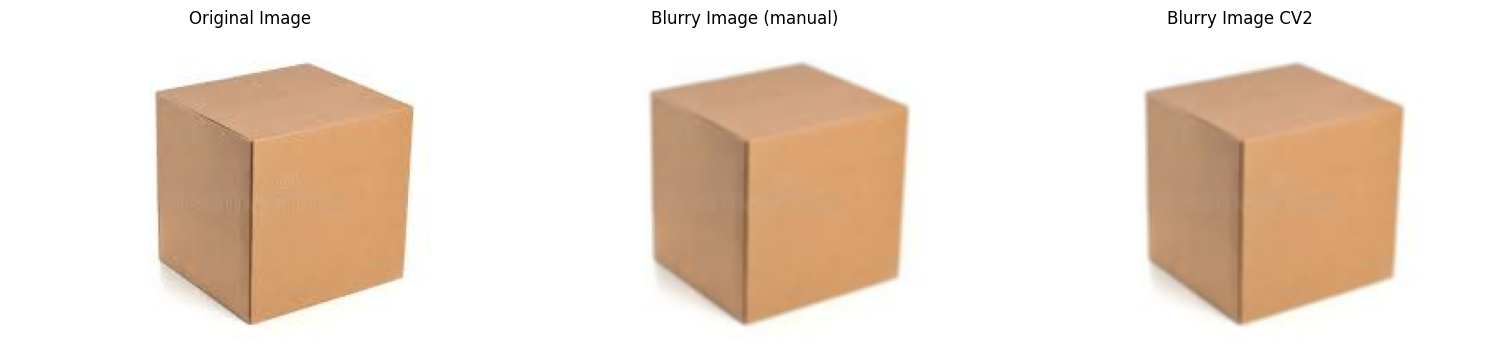

In [37]:
# function for simple/Average blur filter
def simple_blur(image, kernel_size=3):
    # Define the kernel
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size ** 2) #for 3x3 kernel individual pixel value is 1/9

    # Get image dimensions
    h, w, ch = image.shape

    # Create a padded version of the image
    pad = kernel_size // 2 # Calculate padding size so that each pixel is centered in the kernel; for nxn kernel, padding is (n//2)
    padded_image = cv2.copyMakeBorder(image, pad, pad, pad, pad, cv2.BORDER_REFLECT)
   
    # Initialize the output image
    blurred_image = np.zeros_like(image,dtype=np.float32)

    # Apply the kernel
    for c in range(ch):  # Loop through each channel 
        for i in range(h):
            for j in range(w):
                # Extract the region of interest where the kernel will be applied, it is the area of the image that the kernel will cover
                roi = padded_image[i:i+kernel_size, j:j+kernel_size,c]

                # Apply the kernel
                blurred_image[i, j,c] = np.sum(roi * kernel)
    
    # Convert back to the original data type
    blurred_image = blurred_image.astype(image.dtype)
    return blurred_image

# Load the image
img = box

# Apply simple blur
avg_blur_manual = simple_blur(img)

# Display the original and noisy images
plt.figure(figsize=(15, 7))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Blurry Image (manual)")
plt.imshow(avg_blur_manual)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Blurry Image CV2")
avg_blur_cv2 = cv2.blur(img, (3, 3))
plt.imshow(avg_blur_cv2)
plt.axis('off')

plt.tight_layout()
plt.show()

Apply Weighted Gaussain Blur filter

In [32]:
# visualizing the gaussian kernal 
size,sigma = 3, 2
center = size // 2  
x, y = np.meshgrid(np.arange(size) - center, np.arange(size) - center)
print("x:\n", x)
print("y:\n", y)
kernel = np.exp(-(x**2 + y**2) / (2 * sigma**2)) / (2 * np.pi * sigma**2)
# Normalize the kernel
kernel /= np.sum(kernel)
print("Gaussian Kernel:\n", kernel)


x:
 [[-1  0  1]
 [-1  0  1]
 [-1  0  1]]
y:
 [[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]
Gaussian Kernel:
 [[0.10186806 0.11543164 0.10186806]
 [0.11543164 0.13080118 0.11543164]
 [0.10186806 0.11543164 0.10186806]]


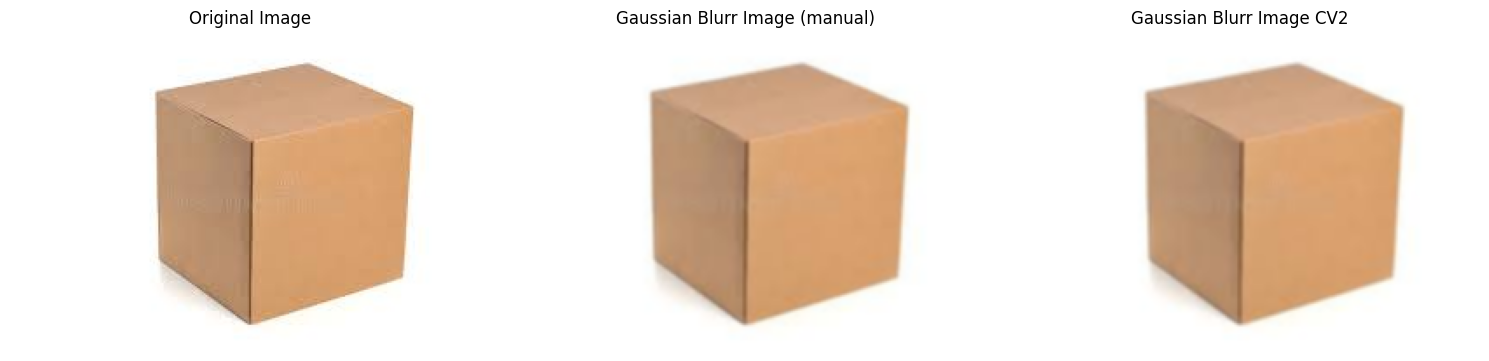

In [35]:
# function for calculation of gaussain kernel
def gaussian_kernel(size, sigma=1):
    # Create a grid of coordinates centered at (0, 0)
    center = size // 2
    x, y = np.meshgrid(np.arange(size) - center, np.arange(size) - center)
    
    # Compute the Gaussian formula
    kernel = np.exp(-(x**2 + y**2) / (2 * sigma**2)) / (2 * np.pi * sigma**2)
    
    # Normalize to ensure the kernel sums to 1
    return kernel / np.sum(kernel)

# function for gaussain blur filter
def gaussian_blur(image, kernel_size=3, sigma=1):
    # Define the kernel
    kernel = gaussian_kernel(kernel_size, sigma)

    # Get image dimensions
    h, w, ch = image.shape

    # Create a padded version of the image
    pad = kernel_size // 2 # Calculate padding size so that each pixel is centered in the kernel; for nxn kernel, padding is (n//2)
    padded_image = cv2.copyMakeBorder(image, pad, pad, pad, pad, cv2.BORDER_REFLECT)

    # Initialize the output image
    blurred_image = np.zeros_like(image,dtype=np.float32)

    # Apply the kernel
    for c in range(ch):  # Loop through each channel 
        for i in range(h):
            for j in range(w):
                # Extract the region of interest where the kernel will be applied, it is the area of the image that the kernel will cover
                roi = padded_image[i:i+kernel_size, j:j+kernel_size,c]

                # Apply the kernel
                blurred_image[i, j,c] = np.sum(roi * kernel)
    
    # Convert back to the original data type
    blurred_image = blurred_image.astype(image.dtype)
    return blurred_image

# Load the image
img = box

# Apply gaussian_blur
avg_blur_manual = gaussian_blur(img)

# Display the original and noisy images
plt.figure(figsize=(15, 7))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Gaussian Blurr Image (manual)")
plt.imshow(avg_blur_manual)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Gaussian Blurr Image CV2")
avg_blur_cv2 = cv2.GaussianBlur(img, (3, 3),1.5)
plt.imshow(avg_blur_cv2)
plt.axis('off')

plt.tight_layout()
plt.show()

Applying Median filter

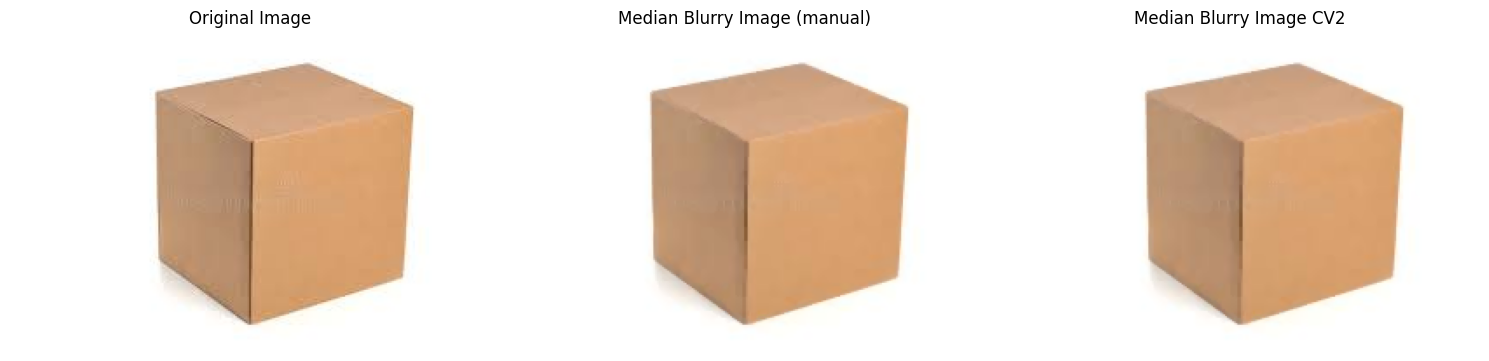

In [43]:
# function for median blur filter
def median_blur(image, kernel_size=3):
    # Get image dimensions
    h, w, ch = image.shape

    # Create a padded version of the image
    pad = kernel_size // 2 # Calculate padding size so that each pixel is centered in the kernel; for nxn kernel, padding is (n//2)
    padded_image = cv2.copyMakeBorder(image, pad, pad, pad, pad, cv2.BORDER_REFLECT)
   
    # Initialize the output image
    blurred_image = np.zeros_like(image,dtype=np.float32)

    # Apply the kernel
    for c in range(ch):  # Loop through each channel 
        for i in range(h):
            for j in range(w):
                # Extract the region of interest where the kernel will be applied, it is the area of the image that the kernel will cover
                roi = padded_image[i:i+kernel_size, j:j+kernel_size,c]
                
                median_value = np.median(roi) # Calculate the median value of the region of interest
                
                # Replace the pixel value with the median value, This is the key difference from average blur, where we take the mean instead of the median. The median is less sensitive to outliers than the mean, making it effective for reducing noise while preserving edges.
                blurred_image[i, j,c] = median_value # set the blurred image pixel to the median value of the region of interest
    
    # Convert back to the original data type
    blurred_image = blurred_image.astype(image.dtype)
    return blurred_image

# Load the image
img = box

# Apply simple blur
median_blur_manual = median_blur(img)

# Display the original and noisy images
plt.figure(figsize=(15, 7))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Median Blurry Image (manual)")
plt.imshow(median_blur_manual)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Median Blurry Image CV2")
median_blur_cv2 = cv2.medianBlur(img,3)
plt.imshow(median_blur_cv2)
plt.axis('off')

plt.tight_layout()
plt.show()

# Sharpning Filters

Applying Sobel and Prewitt filter

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-139.0..113.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-177.0..198.0].


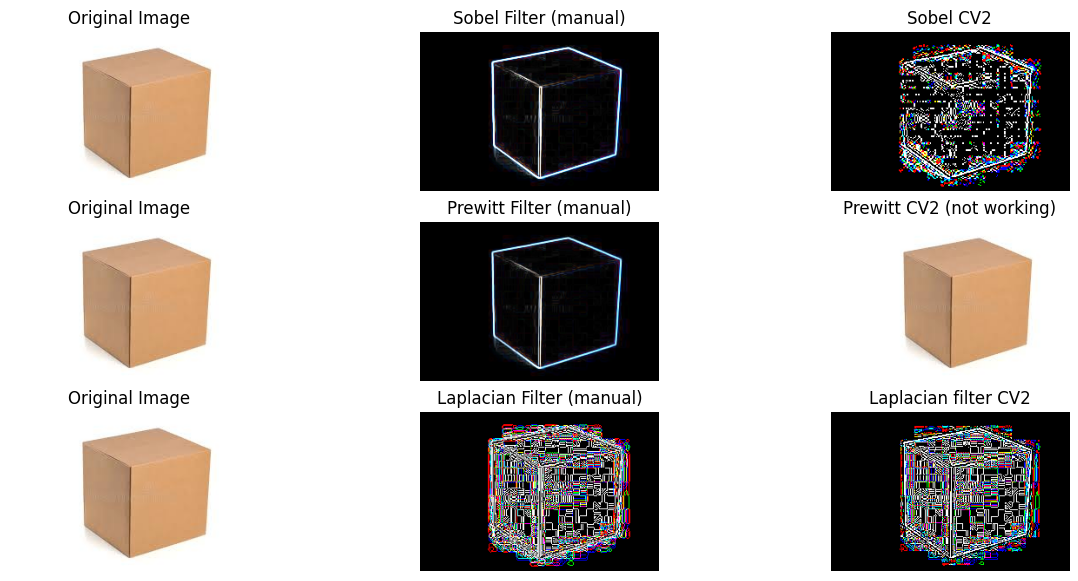

In [61]:
# Create a function for sobel and prewitt filters for edge detection
def sharpen_filter(image, type = "sobel"):
    if type == "sobel":
        # Sobel filter kernels
        kernel_x = np.array([[1, 0, -1],
                             [2, 0, -2],
                             [1, 0, -1]])
        kernel_y = np.array([[1, 2, 1],
                             [0, 0, 0],
                             [-1, -2, -1]])
    elif type == "prewitt":
        # Prewitt filter kernels
        kernel_x = np.array([[1, 0, -1],
                             [1, 0, -1],
                             [1, 0, -1]])
        kernel_y = np.array([[1, 1, 1],
                             [0, 0, 0],
                             [-1, -1, -1]])
    elif type == "laplacian":
         # Laplacian filter kernel
         laplacian_kernel = np.array([[0, 1, 0],
                                 [1, -4, 1],
                                 [0, 1, 0]])
    else:
        raise ValueError("Unknown filter type. Use either 'sobel' , 'prewitt' or 'laplacian'.")

    # Get image dimensions
    h, w, ch = image.shape

    # Create a padded version of the image
    pad = 1 # Padding size for 3x3 kernel is 1 pixel on each side
    padded_image = cv2.copyMakeBorder(image, pad, pad, pad, pad, cv2.BORDER_REFLECT)
   
    # Initialize the output image
    edged_image = np.zeros_like(image,dtype=np.float32)

    # Apply the kernel
    for c in range(ch):  # Loop through each channel 
        for i in range(h):
            for j in range(w):
                # Extract the region of interest where the kernel will be applied, it is the area of the image that the kernel will cover
                roi = padded_image[i:i+3, j:j+3,c]
                if type != "laplacian":
                    # Apply the kernel_x and kernel_y to calculate gradients
                    grad_x = np.sum(roi * kernel_x)
                    grad_y = np.sum(roi * kernel_y)

                    # Calculate the magnitude of the gradient
                    magnitude = np.sqrt(grad_x**2 + grad_y**2)
                    # Normalize the magnitude to the range of [0, 255]
                    magnitude = np.clip(magnitude, 0, 255)
                    # Set the pixel value in the output image   
                    edged_image[i, j,c] = magnitude
                
                # For Laplacian, we only need the Laplacian kernel
                if type == "laplacian":
                    # Apply the Laplacian kernel
                    laplacian_value = np.sum(roi * laplacian_kernel)
                    # Set the pixel value in the output image   
                    edged_image[i, j,c] = laplacian_value
                    
    # Convert back to the original data type
    edged_image = edged_image.astype(image.dtype)
    return edged_image

# Load the image
img = box

# Apply Sobel and Prewitt filters
sobel_manual = sharpen_filter(img, type="sobel")
prewitt_manual = sharpen_filter(img, type="prewitt")
laplacian_manual = sharpen_filter(img, type="laplacian")

# Display the original and filtered images
plt.figure(figsize=(15, 7))
plt.subplot(3, 3, 1)
plt.title("Original Image")
plt.imshow(img)
plt.axis('off')

plt.subplot(3, 3, 2)
plt.title("Sobel Filter (manual)")
plt.imshow(sobel_manual)
plt.axis('off')

plt.subplot(3, 3, 3)
plt.title("Sobel CV2")
sobel_cv2 = cv2.Sobel(img, cv2.CV_64F, 1, 1, ksize=3)
plt.imshow(sobel_cv2)
plt.axis('off')

plt.subplot(3, 3, 4)
plt.title("Original Image")
plt.imshow(img)
plt.axis('off')

plt.subplot(3, 3, 5)
plt.title("Prewitt Filter (manual)")
plt.imshow(prewitt_manual)
plt.axis('off')

plt.subplot(3, 3, 6)
plt.title("Prewitt CV2 (not working)")
#prewitt_cv2 = cv2.filter2D(img, cv2.CV_64F, np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])) + cv2.filter2D(img, cv2.CV_64F, np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]]))
plt.imshow(img)
plt.axis('off')

plt.subplot(3, 3, 7)
plt.title("Original Image")
plt.imshow(img)
plt.axis('off')

plt.subplot(3, 3, 8)
plt.title("Laplacian Filter (manual)")
plt.imshow(laplacian_manual)
plt.axis('off')

plt.subplot(3, 3, 9)
plt.title("Laplacian filter CV2")
laplacian_cv2 = cv2.Laplacian(img, cv2.CV_64F)
plt.imshow(laplacian_cv2)
plt.axis('off')

plt.show()